In [58]:
%matplotlib inline
import numpy as np
import pandas as pd 
import os

## Lecture et concaténation de tous les fichiers 

In [44]:
allfiles = os.listdir('./data/data valid/')
li = []

for file in allfiles : 
    file = './data valid/' + file 
    if file[-3:] == 'csv':
        li.append(pd.read_csv(file, header=0, sep=';'))
    else:
        li.append(pd.read_csv(file, header=0, sep='\t'))

dt = pd.concat(li, axis=0, ignore_index=True)

## Modification des types 

In [45]:
dt.head()

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,01/07/2015,100,110,1,PORTE MAILLOT,71379,AMETHYSTE,241
1,01/07/2015,100,110,1,PORTE MAILLOT,71379,AUTRE TITRE,215
2,01/07/2015,100,110,1,PORTE MAILLOT,71379,FGT,518
3,01/07/2015,100,110,1,PORTE MAILLOT,71379,IMAGINE R,2556
4,01/07/2015,100,110,1,PORTE MAILLOT,71379,NAVIGO,14463


In [46]:
dt['JOUR'] = pd.to_datetime(dt['JOUR'], format='%d/%m/%Y')


#### 8% des données ont la valeur "moins de 5" 

In [48]:
dt.loc[dt['NB_VALD'] == 'Moins de 5'].shape[0]/dt.shape[0]*100

8.13209471566006

In [49]:
dt.loc[dt['NB_VALD'] == 'Moins de 5'] = 5
dt['NB_VALD'] = pd.to_numeric(dt['NB_VALD'])

In [54]:
dt['JOUR'] = dt['JOUR'].astype(str)

In [55]:
dt.dtypes

JOUR               object
CODE_STIF_TRNS      int64
CODE_STIF_RES      object
CODE_STIF_ARRET    object
LIBELLE_ARRET      object
ID_REFA_LDA        object
CATEGORIE_TITRE    object
NB_VALD             int64
dtype: object

In [61]:
dt_agg = pd.DataFrame(dt.groupby(["JOUR","LIBELLE_ARRET"])['NB_VALD'].sum().reset_index())

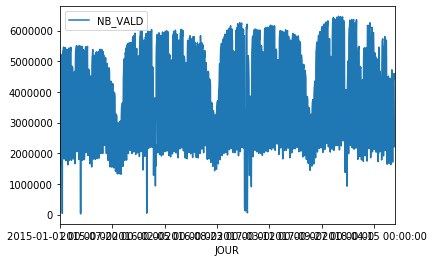

In [63]:
dt_agg.groupby('JOUR').sum().plot()

In [64]:
dt_agg.to_csv('./datacamp-challenge-creation/data/validation_data_agg_2015_2018.csv')